11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training started...

Epoch 1/10, Loss: 0.027110
Epoch 2/10, Loss: 0.015571
Epoch 3/10, Loss: 0.012701
Epoch 4/10, Loss: 0.011088
Epoch 5/10, Loss: 0.009898
Epoch 6/10, Loss: 0.008949
Epoch 7/10, Loss: 0.008094
Epoch 8/10, Loss: 0.007759
Epoch 9/10, Loss: 0.007150
Epoch 10/10, Loss: 0.006508

Training complete.


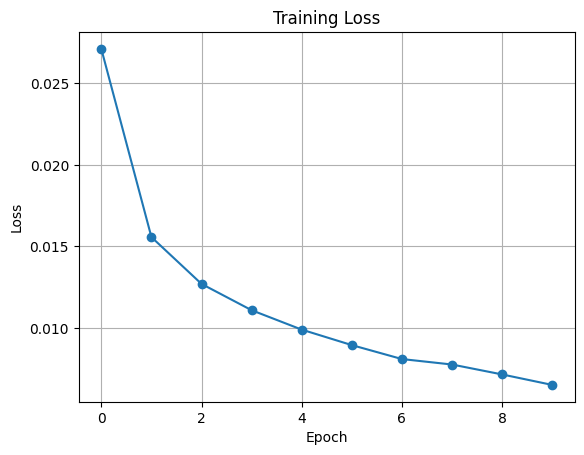

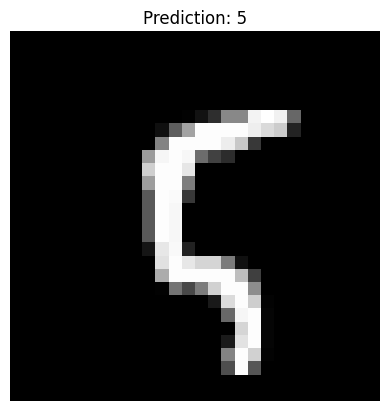

In [ ]:
# Experiment – Implementation of Three-Layer Neural Network on MNIST

# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Step 2: Load and Preprocess the Dataset
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0  # Normalize and flatten (28x28 → 784)
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))

# Step 3: Initialize the Network Parameters
input_size, hidden_size, output_size = 784, 64, 10
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Step 4: Define Activation and Loss Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def loss_fn(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8))

# Step 5: Train the Model
epochs = 10
lr = 0.1
losses = []

print("Training started...\n")

for epoch in range(epochs):
    total_loss = 0

    for i in range(X_train.shape[0]):
        # Forward pass
        x = X_train[i:i+1]
        y = y_train[i:i+1]
        z1 = x @ W1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)

        # Compute loss
        loss = loss_fn(y, a2)
        total_loss += loss

        # Backward pass
        dz2 = a2 - y
        dW2 = a1.T @ dz2
        db2 = dz2
        dz1 = (dz2 @ W2.T) * sigmoid_deriv(a1)
        dW1 = x.T @ dz1
        db1 = dz1

        # Update weights
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    avg_loss = total_loss / X_train.shape[0]
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

print("\nTraining complete.")

# Step 6: Visualize Training Loss
plt.plot(losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Step 7: Predict a Sample Digit
def predict(img):
    img = img.reshape(1, 784) / 255.0
    a1 = sigmoid(img @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    return np.argmax(a2)

idx = 100
plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predict(X_train[idx])}")
plt.axis('off')
plt.show()
